A partir do sistema de malha fechada mostrado na Figura, desenhe um compensador por avanço de fase Gc(s) tal que a margem de fase seja de 45º, a margem de ganho não seja inferior a 8 dB e o erro estático constante de velocidade $K_V$ seja de 4,0 $s^{-1}$. Faça um programa em python para o cálculo desse compensador.

Trace as curvas de resposta ao degrau unitário e à rampa unitária do sistema compensado

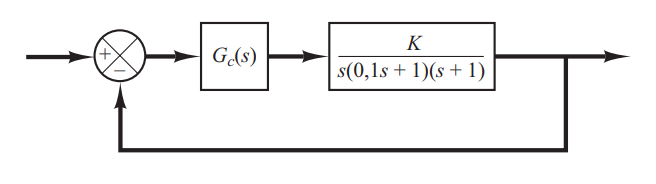

In [1]:
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 10.0 MB/s eta 0:00:00


In [13]:
from control import matlab as mtb
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#Sistema não compensado
K = 4 # K escolhido para que o erro de velocidade seja 4s^-1
num = [K]
den = [0.1,1.1,1,0]

G = mtb.tf(num,den)
omega=np.logspace(-2,2,5000)

[Ganho, Fase, w] = mtb.bode(G,omega, plot = False)

GanhodB = 20*np.log(Ganho)
fase = (Fase)*180/np.pi

figura = make_subplots(rows=2,cols=1)

figura.add_trace(go.Scatter(x=w, name = 'Módulo em dB', y = GanhodB),row=1,col=1)
figura.add_trace(go.Scatter(x=w, name = 'Angulo(deg)', y = Fase),row=2,col=1)
figura.update_xaxes(type = 'log',title="Frequência")
figura.update_yaxes(title="Módulo em dB",row=1,col=1)
figura.update_yaxes(title="Ângulo(deg)",row=2,col=1)
figura.update_layout(title_text="Módulo e Ângulo da função de transferência do sistema não compensado")

figura.show()




$G_c(s)=K_c \cdot α \frac{Ts+1} {αTs+1}  $

Tal que 0<α<1



In [35]:
from numpy.ma.core import log10
Mganho, Mfase, freqCF, freqCG = mtb.margin(G)
print("Margem de Ganho:", Mganho)
print("Margem de fase:", Mfase)
print("Frequência de cruzamento de ganho:", freqCG)
print("Frequência de cruzamento de fase:", freqCF)

#Angulo de fase desejado phi= MFdesejada - MFplanta + anguloCorrecao(entre 5 e 12)
MFdesejada=45
phi=MFdesejada-Mfase+11.15
#Calculo do alpha
alpha=(1-np.sin(phi))/ (1+np.sin(phi))
print("alpha=",alpha)
desloc=1/np.sqrt(alpha)
deslocdB=20*np.log10(desloc)
Mganho, Mfase, freqCF, freqCG = mtb.margin(G*desloc)
T=desloc/freqCG
print("T=",T)
numC = [T,1]
denC =[T*alpha,1]
Gc =mtb.tf(numC,denC)
print("Compensador avanço:", Gc)

[ganhoComp, faseComp, freq] = mtb.bode(Gc,omega, plot = False)

ganhoCompdB = 20*np.log10(ganhoComp)
faseComp = faseComp*180/np.pi

figura = go.Figure()
figura.add_trace(go.Scatter(x=freq, name = 'Módulo em dB', y = GanhodB))
figura.add_trace(go.Scatter(x=freq, name = 'Módulo Compensador em dB', y = ganhoCompdB))
figura.update_xaxes(type = 'log')
figura.show()

figura = go.Figure()
figura.add_trace(go.Scatter(x=freq, name = 'Angulo em graus', y = Fase))
figura.add_trace(go.Scatter(x=freq, name = 'Angulo Compensador em graus', y = faseComp))
figura.update_xaxes(type = 'log')
figura.show()

sist_comp=G*Gc
print(sist_comp)
Mganho, Mfase, freqCF, freqCG = mtb.margin(sist_comp)
print("Margem de Ganho:", Mganho)
print("Margem de fase:", Mfase)
print("Frequência de cruzamento de ganho:", freqCG)
print("Frequência de cruzamento de fase:", freqCF)
[Ganho_comp, Fase_comp, w] = mtb.bode(G,omega, plot = False)
figura = make_subplots(rows=2,cols=1)

figura.add_trace(go.Scatter(x=w, name = 'Módulo em dB', y = Ganho_comp),row=1,col=1)
figura.add_trace(go.Scatter(x=w, name = 'Angulo(deg)', y = Fase_comp),row=2,col=1)
figura.update_xaxes(type = 'log',title="Frequência")
figura.update_yaxes(title="Módulo em dB",row=1,col=1)
figura.update_yaxes(title="Ângulo(deg)",row=2,col=1)
figura.update_layout(title_text="Módulo e Ângulo da função de transferência do sistema compensado")

Margem de Ganho: 2.750000000000001
Margem de fase: 17.705040874443
Frequência de cruzamento de ganho: 1.8612163459626665
Frequência de cruzamento de fase: 3.1622776601683795
alpha= 0.19147306043457185
T= 0.7933267676517527
Compensador avanço: 
0.7933 s + 1
------------
0.1519 s + 1




              3.173 s + 4
----------------------------------------
0.01519 s^4 + 0.2671 s^3 + 1.252 s^2 + s

Margem de Ganho: 4.869527708742579
Margem de fase: 45.807923022406385
Frequência de cruzamento de ganho: 2.880673599477975
Frequência de cruzamento de fase: 7.848498769568425


$G_c(s)=1 \frac{0.7933s+1} {0.1519s+1}  $

T=0.7933

α=0.1915

T $\cdot$ α=0.1519

In [15]:
#Resposta ao Degrau
from control.matlab import step, rss
#Para a resposta do degrau e rampa devemos determinar a função de transferência de malha fechada do sistema
#compensado calculado
sistema_malhafechada=mtb.feedback(sist_comp,1)
print(sistema_malhafechada)

tempo=np.linspace(0,4.8,1000)
eixoY,eixoX = mtb.step(sistema_malhafechada,tempo)

figura = go.Figure()
figura.add_trace(go.Scatter(x= eixoX, y = eixoY))
figura.show()


                   3.173 s + 4
--------------------------------------------------
0.01519 s^4 + 0.2671 s^3 + 1.252 s^2 + 4.173 s + 4




                     3.173 s + 4
------------------------------------------------------
0.01519 s^5 + 0.2671 s^4 + 1.252 s^3 + 4.173 s^2 + 4 s



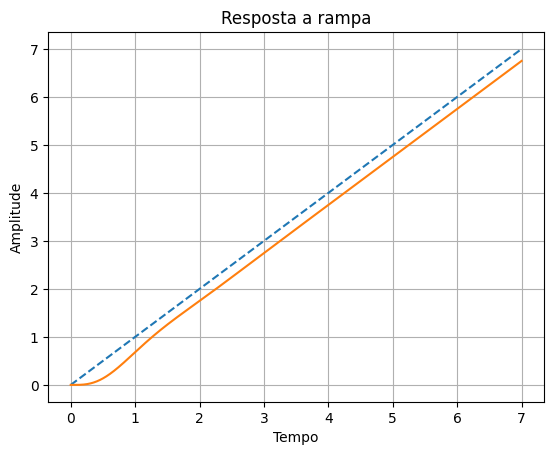

In [33]:
#Rampa

import matplotlib.pyplot as plt

degrau=mtb.tf([1],[1,0])
sist_respdegrau=degrau*sistema_malhafechada
print(sist_respdegrau)
tempo=np.linspace(0,7,1000)
y,t=mtb.step(sist_respdegrau,tempo)
plt.plot(t, t,ls='--')

plt.plot(t, y)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Resposta a rampa')
plt.grid(True)
plt.show()